# 线性回归

使用TensorFlow库的线性回归学习算法示例。

In [66]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

In [95]:
#定义用的常量
n_samples=100
learning_rate=0.01
training_epochs = 800
display_step = 50

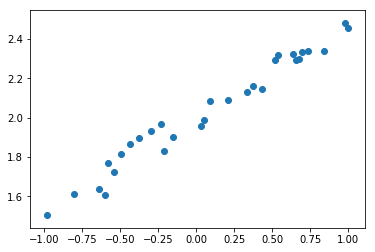

In [99]:
# [-1,1]划分成n_samples等分
X = np.linspace(-1, 1, n_samples)
np.random.shuffle(X)
# 加入一定的扰乱
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (n_samples,))
# 划分训练集和测试集
X_train, Y_train = X[:70], Y[:70]
X_test, Y_test = X[70:], Y[70:]
plt.scatter(X_test, Y_test)
plt.show()

In [100]:
# 建立输入数据的placeholder
X = tf.placeholder('float')
Y = tf.placeholder('float')
# 初始化参数
W = tf.Variable(rng.randn(),name='weight')
b = tf.Variable(rng.randn(),name='bias')
# 建立模型
pred = tf.add(tf.multiply(X,W),b)
cost = tf.reduce_sum(tf.pow(Y-pred,2))/(2*n_samples)
# 使用优化函数
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# 初始化所有的变量
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.276017785 W= -0.8596238 b= 1.5698638
Epoch: 0100 cost= 0.203250915 W= -0.70985615 b= 1.68738
Epoch: 0150 cost= 0.153050512 W= -0.57599556 b= 1.7716638
Epoch: 0200 cost= 0.117061719 W= -0.4565621 b= 1.8323736
Epoch: 0250 cost= 0.090494208 W= -0.350142 b= 1.8763282
Epoch: 0300 cost= 0.070465140 W= -0.25541705 b= 1.908341
Epoch: 0350 cost= 0.055144776 W= -0.17117262 b= 1.9318343
Epoch: 0400 cost= 0.043312855 W= -0.09629877 b= 1.9492139
Epoch: 0450 cost= 0.034116969 W= -0.029787272 b= 1.9621953
Epoch: 0500 cost= 0.026940666 W= 0.029271306 b= 1.9719949
Epoch: 0550 cost= 0.021325732 W= 0.08169518 b= 1.9794801
Epoch: 0600 cost= 0.016925210 W= 0.12821758 b= 1.9852654
Epoch: 0650 cost= 0.013472738 W= 0.16949444 b= 1.9898013
Epoch: 0700 cost= 0.010762249 W= 0.2061123 b= 1.9933989
Epoch: 0750 cost= 0.008633495 W= 0.23859054 b= 1.9962947
Epoch: 0800 cost= 0.006961088 W= 0.26739606 b= 1.998653
Training cost= 0.006961088 W= 0.26739606 b= 1.998653 



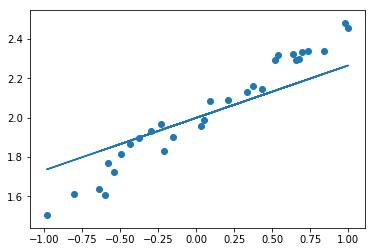

In [101]:
# 开启Session
with tf.Session() as sess:
    # 运行初始化
    sess.run(init)
    # 执行训练
    for epoch in range(training_epochs):
        # 每次使用一个样本训练
        for (x, y) in zip(X_train, Y_train):
            sess.run(optimizer,feed_dict={X:x,Y:y})
        #每过display_step打印结果
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: X_train, Y:Y_train})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
    # 计算最后的结果
    training_cost = sess.run(cost, feed_dict={X: X_train, Y: Y_train})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    plt.scatter(X_test, Y_test)
    plt.plot(X_test, sess.run(pred,feed_dict={X: X_test}))
    plt.show()
